In [1]:
import os
import re
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from run1.lib.utils import MyUtil

In [2]:
CURRENT_DIR = Path.cwd()  # Current directory of the running file

In [3]:
OUTDIR = CURRENT_DIR / "S01"
os.makedirs(OUTDIR, exist_ok=True)

In [4]:
filenames = [f for f in os.listdir(OUTDIR)]
print(f"Found {len(filenames)} files:")
print(filenames)


Found 3 files:
['batch_0.pkl', 'batch_1.pkl', 'batch_2.pkl']


In [5]:
shap_values_list = []
for filename in os.listdir(OUTDIR):
    print(f"Loading {filename}...")
    data = MyUtil.load_data(OUTDIR / filename)
    shap_values_list.append(data["shap_values"])

Loading batch_0.pkl...
Loading batch_1.pkl...
Loading batch_2.pkl...


In [6]:
# Combine SHAP values
feature_names = shap_values_list[0].feature_names

# Combine values
combined_shape_values = np.vstack([sv.values for sv in shap_values_list])
combined_shape_values.shape

# Combine base values
combined_base_values = np.concatenate([sv.base_values for sv in shap_values_list])
combined_base_values.shape

# Combine data (feature values)
combined_data = np.vstack([sv.data for sv in shap_values_list])
combined_data.shape

(9, 32)

In [7]:
shap_values = shap.Explanation(
    values=combined_shape_values, 
    base_values=combined_base_values,
    data=combined_data,
    feature_names=shap_values_list[0].feature_names,
)

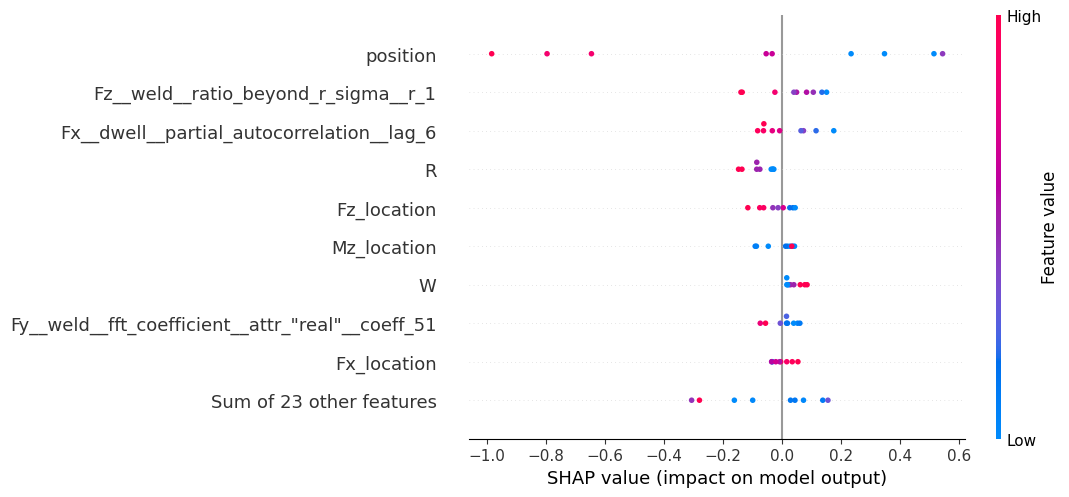

In [8]:
shap.plots.beeswarm(shap_values)

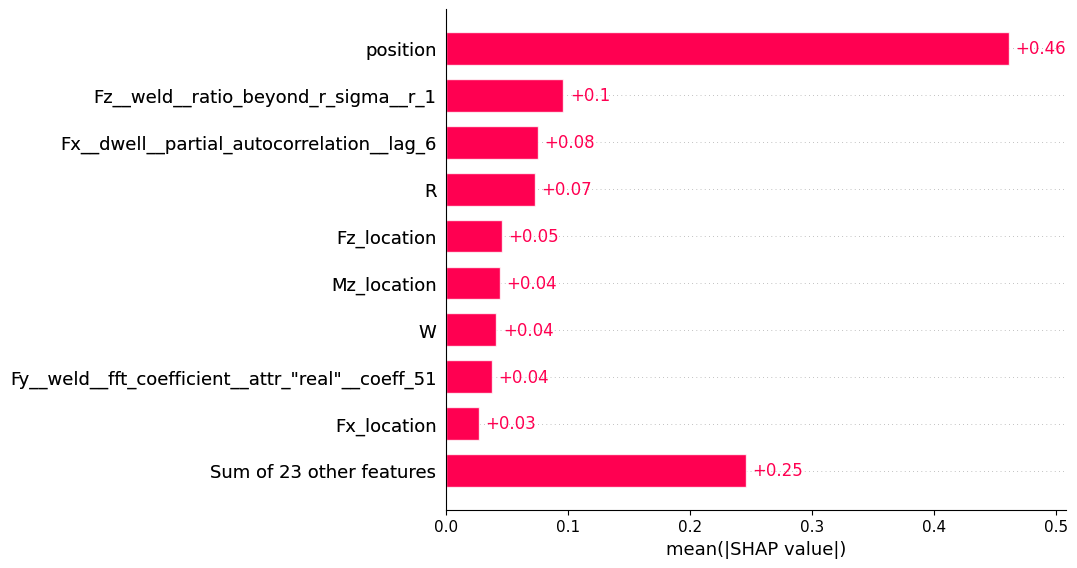

In [9]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

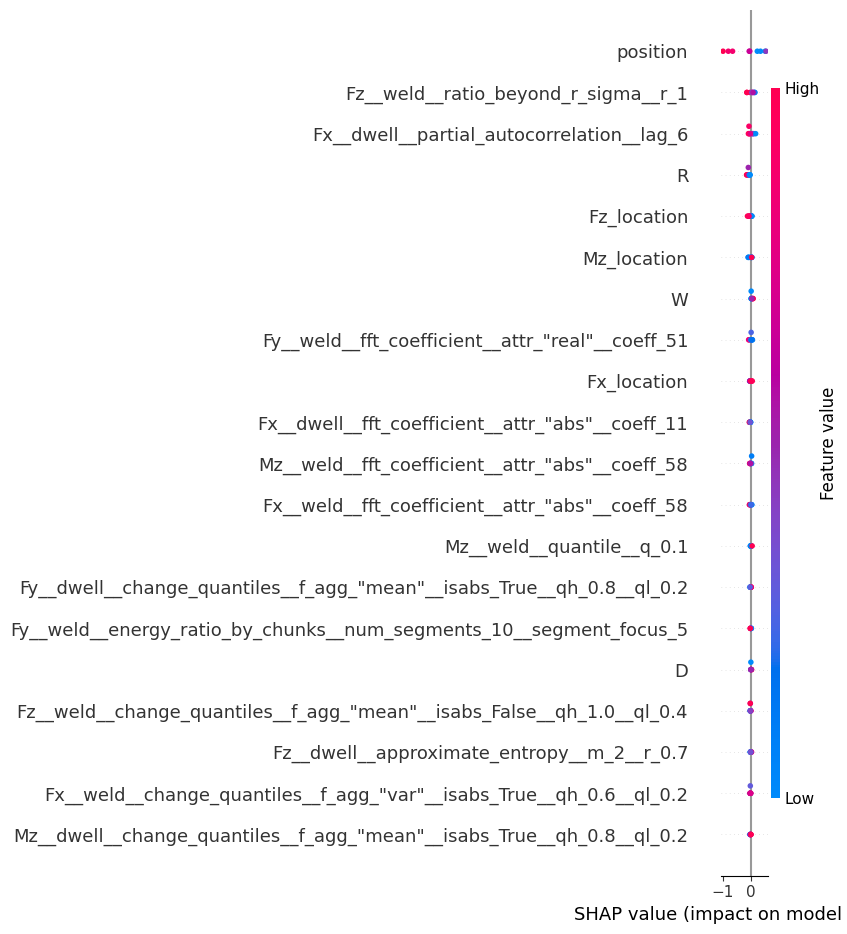

In [10]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

In [11]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
0,position,0.461386
28,Fz__weld__ratio_beyond_r_sigma__r_1,0.096058
10,Fx__dwell__partial_autocorrelation__lag_6,0.075008
1,R,0.072439
6,Fz_location,0.045465
7,Mz_location,0.043953
2,W,0.041142
25,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.037606
4,Fx_location,0.026595
8,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.022970


In [12]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
0,position,0.461386,SHAP_importance,1
28,Fz__weld__ratio_beyond_r_sigma__r_1,0.096058,SHAP_importance,2
10,Fx__dwell__partial_autocorrelation__lag_6,0.075008,SHAP_importance,3
1,R,0.072439,SHAP_importance,4
6,Fz_location,0.045465,SHAP_importance,5
7,Mz_location,0.043953,SHAP_importance,6
2,W,0.041142,SHAP_importance,7
25,"Fy__weld__fft_coefficient__attr_""real""__coeff_51",0.037606,SHAP_importance,8
4,Fx_location,0.026595,SHAP_importance,9
8,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.022970,SHAP_importance,10


In [13]:
ranking.to_excel("S02.xlsx", index=False)